In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [17]:
df=pd.read_csv("./breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
df.diagnosis=[1 if each=="M" else 0 for each in df.diagnosis] # Binary classification
y=df.diagnosis.values
x_data=df.drop(["diagnosis","id"],axis=1)


In [19]:
selected_features = ["radius_mean", "texture_mean", "perimeter_mean"]  # Replace with actual feature names
x_data = x_data[selected_features]


In [20]:
x_data

,radius_mean,texture_mean,perimeter_mean
0,17.99,10.38,122.80
1,20.57,17.77,132.90
2,19.69,21.25,130.00
3,11.42,20.38,77.58
4,20.29,14.34,135.10
...,...,...,...
564,21.56,22.39,142.00
565,20.13,28.25,131.20
566,16.60,28.08,108.30
567,20.60,29.33,140.10


In [21]:
import plotly.graph_objects as go
# Create an interactive 3D figure
fig = go.Figure()

# Add scatter trace for actual points
fig.add_trace(go.Scatter3d(
    x=df[selected_features[0]],
    y=df[selected_features[1]],
    z=df[selected_features[2]],
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Actual'
))


# Update layout with axis labels and title
fig.update_layout(
    title='Original Data Plot',
    scene=dict(
        xaxis_title=selected_features[0],
        yaxis_title=selected_features[1],
        zaxis_title=selected_features[2]
    )
)
fig.show()


In [22]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [23]:
# normalization(Adjusting the range from 0 to 1)

x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))
x

,radius_mean,texture_mean,perimeter_mean
0,0.060649,0.018725,0.638054
1,0.074863,0.059437,0.693696
2,0.070015,0.078609,0.677720
3,0.024455,0.073816,0.388934
4,0.073320,0.040541,0.705816
...,...,...,...
564,0.080317,0.084889,0.743828
565,0.072439,0.117172,0.684331
566,0.052992,0.116236,0.558173
567,0.075028,0.123122,0.733361


# K-NEAREST NEIGHBOUR(KNN) CLASSIFICATION

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)
prediction

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [26]:
fig = go.Figure()

# Add scatter trace for actual points with labels
fig.add_trace(go.Scatter3d(
    x=x_train[selected_features[0]],
    y=x_train[selected_features[1]],
    z=x_train[selected_features[2]],
    mode='markers',
    marker=dict(size=5, color=y_train, colorscale='Viridis', showscale=True),
    text=y_train,  # Hover text to show labels
    hoverinfo="text",
    name='Actual'
))

# Update layout with axis labels and title
fig.update_layout(
    title='Training Data Plot',
    scene=dict(
        xaxis_title=selected_features[0],
        yaxis_title=selected_features[1],
        zaxis_title=selected_features[2]
    )
)

fig.show()


In [27]:
fig = go.Figure()

# Add scatter trace for actual points with labels
fig.add_trace(go.Scatter3d(
    x=x_test[selected_features[0]],
    y=x_test[selected_features[1]],
    z=x_test[selected_features[2]],
    mode='markers',
    marker=dict(size=5, color=y_test, colorscale='Viridis', showscale=True),
    text=y_test,  # Hover text to show labels
    hoverinfo="text",
    name='Predicted'
))

# Update layout with axis labels and title
fig.update_layout(
    title='Predicted Data Plot',
    scene=dict(
        xaxis_title=selected_features[0],
        yaxis_title=selected_features[1],
        zaxis_title=selected_features[2]
    )
)

fig.show()


In [28]:
print("{} nn score: {}".format(3,knn.score(x_test,y_test)))

3 nn score: 0.8947368421052632


In [29]:
# find k value
score_list=[]
for each in range(1,15):
    knn2=KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    print("{} nn score: {}".format(each,knn2.score(x_test,y_test)))
    

1 nn score: 0.8830409356725146
2 nn score: 0.8654970760233918
3 nn score: 0.8947368421052632
4 nn score: 0.8771929824561403
5 nn score: 0.8654970760233918
6 nn score: 0.8771929824561403
7 nn score: 0.8713450292397661
8 nn score: 0.8713450292397661
9 nn score: 0.8538011695906432
10 nn score: 0.8771929824561403
11 nn score: 0.8771929824561403
12 nn score: 0.8713450292397661
13 nn score: 0.8654970760233918
14 nn score: 0.8596491228070176


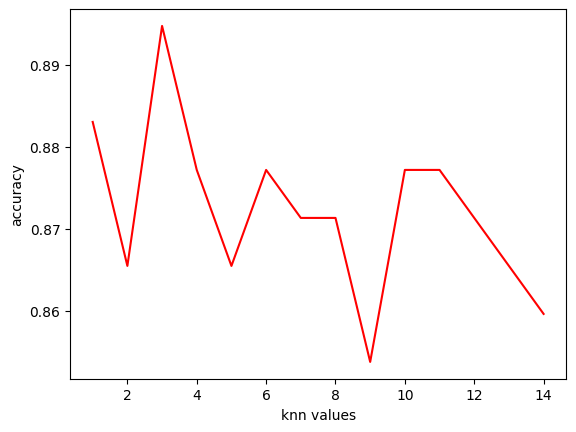

In [30]:
plt.plot(range(1,15),score_list,color="r")
plt.xlabel("knn values")
plt.ylabel("accuracy")
plt.show()